<a href="https://colab.research.google.com/github/TheCiceerGuy/Simulation_Modeling-Labs/blob/main/LAB_5_Markov_Chain_Simulation_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class MarkovChain:
    def __init__(self, transition_matrix, states):
        self.transition_matrix = np.array(transition_matrix)
        self.states = states
        self.n_states = len(states)

    def next_state(self, current_state):
        return np.random.choice(
            self.states,
            p=self.transition_matrix[self.states.index(current_state)]
        )

    def generate_states(self, current_state, n_steps):
        states = [current_state]
        for _ in range(n_steps):
            next_state = self.next_state(current_state)
            states.append(next_state)
            current_state = next_state
        return states

# Define the weather transition matrix and states
weather_transition_matrix = [
    [0.7, 0.2, 0.1],  # Sunny
    [0.3, 0.4, 0.3],  # Rainy
    [0.4, 0.3, 0.3]   # Cloudy
]
weather_states = ["Sunny", "Rainy", "Cloudy"]

# Create a Markov Chain instance
weather_chain = MarkovChain(weather_transition_matrix, weather_states)

# Take user input for starting state and number of predictions
start_state = input("Enter the starting state (Sunny/Rainy/Cloudy): ")
num_days = int(input("Enter the number of days to predict: "))

# Generate weather sequence
weather_sequence = weather_chain.generate_states(start_state, num_days)

# Display output
print("\nPredicted Weather Sequence:")
print(" → ".join(weather_sequence))

# Count occurrences of each state
state_counts = {state: weather_sequence.count(state) for state in weather_states}
print("\nState Occurrences in Simulation:")
for state, count in state_counts.items():
    print(f"{state}: {count} times")


Enter the starting state (Sunny/Rainy/Cloudy): Sunny
Enter the number of days to predict: 10

Predicted Weather Sequence:
Sunny → Rainy → Sunny → Cloudy → Sunny → Sunny → Sunny → Rainy → Sunny → Sunny → Sunny

State Occurrences in Simulation:
Sunny: 8 times
Rainy: 2 times
Cloudy: 1 times


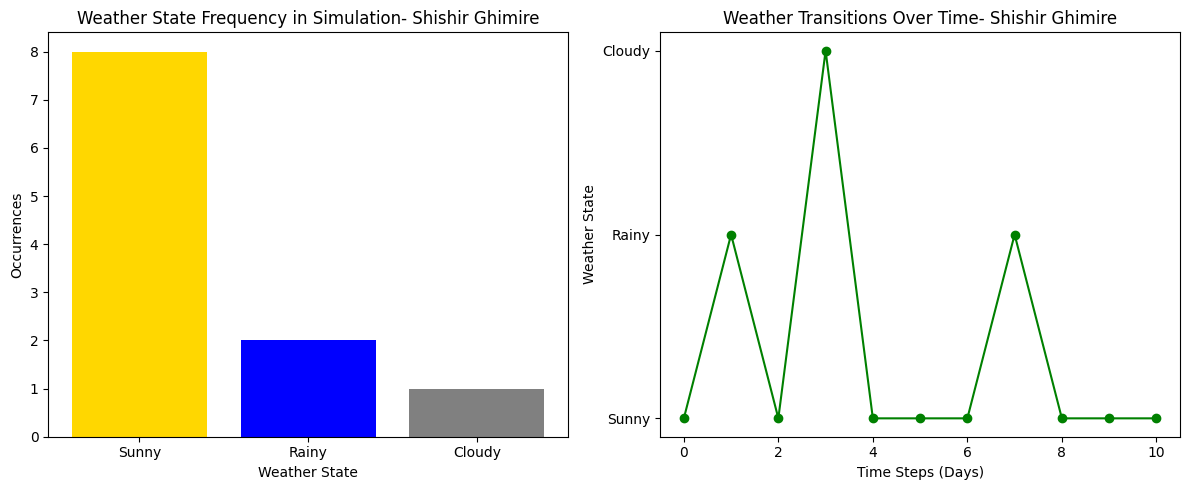

In [3]:

# ------------------- Visualization ------------------- #
import matplotlib.pyplot as plt

# Bar Chart - State Occurrences
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(state_counts.keys(), state_counts.values(), color=['gold', 'blue', 'gray'])
plt.xlabel("Weather State")
plt.ylabel("Occurrences")
plt.title("Weather State Frequency in Simulation- Shishir Ghimire")

# Line Graph - Weather Transitions Over Time
plt.subplot(1, 2, 2)
time_steps = list(range(len(weather_sequence)))
state_indices = [weather_states.index(state) for state in weather_sequence]
plt.plot(time_steps, state_indices, marker='o', linestyle='-', color='green')

plt.yticks(range(len(weather_states)), weather_states)
plt.xlabel("Time Steps (Days)")
plt.ylabel("Weather State")
plt.title("Weather Transitions Over Time- Shishir Ghimire")

plt.tight_layout()
plt.show()